In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
train = pd.read_csv('train_dataset.csv')

In [3]:
train.head()

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,0,0,6,com.pl,0,3,0,0


In [4]:
train.shape

(6728848, 60)

In [24]:
y = train[['label']]

X = train.drop(columns=['label'])

In [5]:
# Exploratory Analysis:

train.columns

Index(['url', 'label', 'source', 'url_has_login', 'url_has_client',
       'url_has_server', 'url_has_admin', 'url_has_ip', 'url_isshorted',
       'url_len', 'url_entropy', 'url_hamming_1', 'url_hamming_00',
       'url_hamming_10', 'url_hamming_01', 'url_hamming_11', 'url_2bentropy',
       'url_3bentropy', 'url_count_dot', 'url_count_https', 'url_count_http',
       'url_count_perc', 'url_count_hyphen', 'url_count_www',
       'url_count_atrate', 'url_count_hash', 'url_count_semicolon',
       'url_count_underscore', 'url_count_ques', 'url_count_equal',
       'url_count_amp', 'url_count_letter', 'url_count_digit',
       'url_count_sensitive_financial_words', 'url_count_sensitive_words',
       'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir',
       'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent',
       'path_has_any_sensitive_words', 'path_count_lower', 'path_count_upper',
       'path_count_nonascii', 'path_has_singlechardir', 'path_has_upperdir'

In [ ]:
train.dtypes

In [6]:
train.dtypes.value_counts()

int64      48
float64     9
object      3
Name: count, dtype: int64

In [ ]:
train.info

In [ ]:
train.nunique() # We can see that urls are entirely unique and acts as an id, so we can omit for our classification modeling


In [ ]:
train.isnull().sum() # There is no missing data

In [25]:
# add label col as str to use as legend label
train['label_str'] = ['Malicious' if i else 'Benign' for i in train.label]

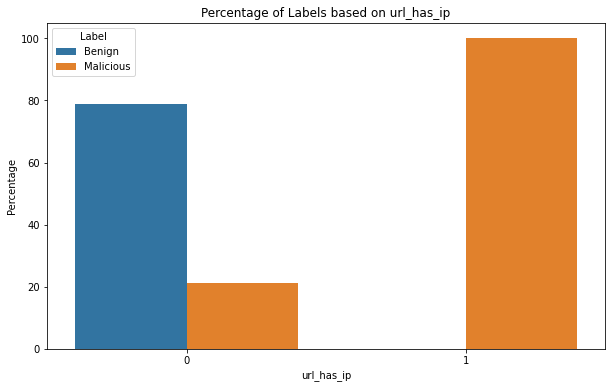

In [26]:
# Group by 'url_has_ip' and count occurrences of each label
counts = train.groupby(['url_has_ip', 'label_str']).size().reset_index(name='count')

# Calculate percentage within each 'url_has_ip' category
counts['percentage'] = counts.groupby('url_has_ip')['count'].transform(lambda x: x / x.sum() * 100)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='url_has_ip', y='percentage', hue='label_str')
plt.title('Percentage of Labels based on url_has_ip')
plt.xlabel('url_has_ip')
plt.ylabel('Percentage')
plt.legend(title='Label')
plt.show()

In [27]:
# take features with bool + labels
bool_feat = [c for c in train.columns if 'has_' in c] + [c for c in train.columns if '_is' in c] + ['label_str']

In [ ]:
bool_feat

ValueError: cannot insert label_str, already exists

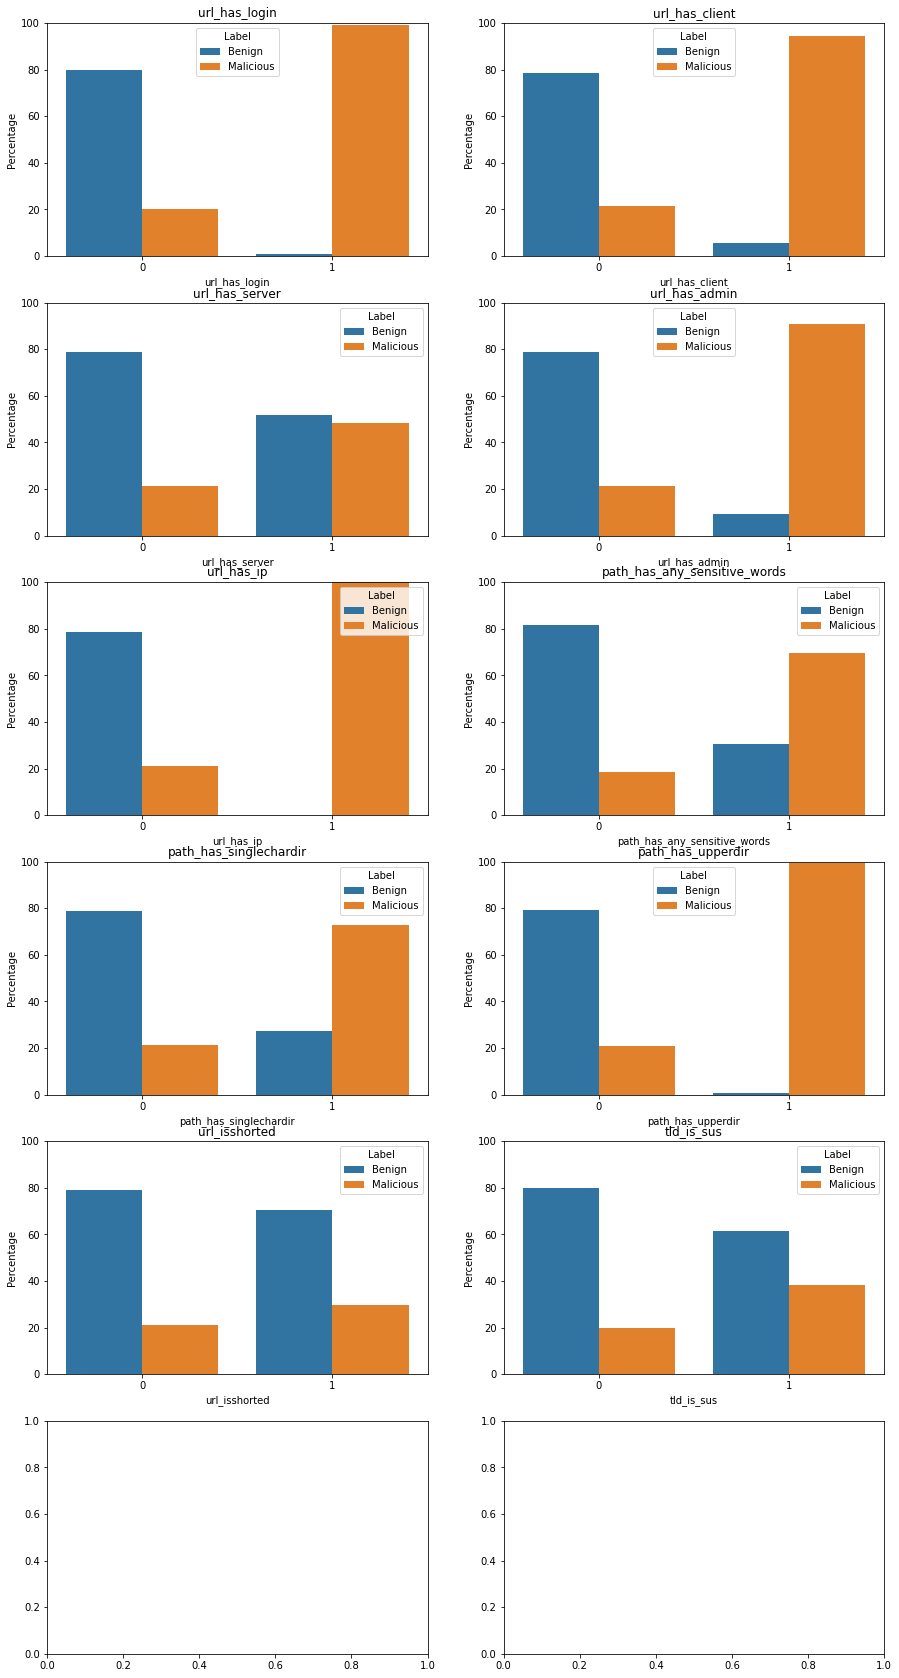

In [28]:
num_plots = len(bool_feat)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop through boolean features
for i, feature in enumerate(bool_feat):
    # Group by 'url_has_ip' and 'label_str' and count occurrences of each label
    counts = train.groupby([feature, 'label_str']).size().reset_index(name='count')

    # Calculate percentage within each category of the boolean feature
    counts['percentage'] = counts.groupby(feature)['count'].transform(lambda x: x / x.sum() * 100)

    # Plot on current subplot
    ax = axes[i // num_cols, i % num_cols]
    sns.barplot(data=counts, x=feature, y='percentage', hue='label_str', ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # set y-lim for consistency
    ax.legend(title='Label')

# Adjust layout and show plot
plt.show()

In [30]:
for title, df in {'Train data': df_train, 'Test data': df_test}.items():
    mean_has_df = df[has_features].groupby('label_text').mean()
    df_mean_barplot = mean_has_df.T.stack().reset_index().rename(columns={'level_0': 'has_feature',
                                                                          0: 'mean_val'})
    plt.figure(figsize=(16, 8))
    g = sns.barplot(x=df_mean_barplot['has_feature'], 
                    y=df_mean_barplot['mean_val'], 
                    hue=df_mean_barplot['label_text'])
    g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
    g.set_title(title)

NameError: name 'df_train' is not defined

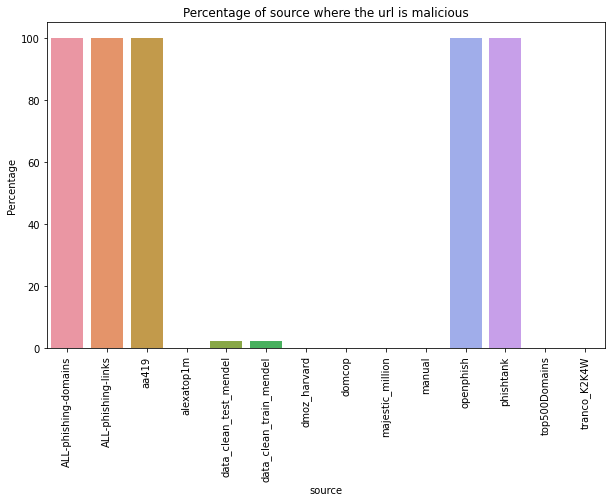

In [31]:
# Group by 'source' and count occurrences where label == 1

# get subset where label == 1
subset = train[train['label'] == 1]
# get counts for each source in subset
counts_label_1 = subset.groupby('source').size().reset_index(name='count_label_1')

# calculate the total count for each source
total_counts = train.groupby('source').size().reset_index(name='total_count')

# merge
merged_data = counts_label_1.merge(total_counts, on='source', how='right')

# calculate percentages
merged_data['percentage'] = (merged_data['count_label_1'] / merged_data['total_count']) * 100

# plot barplot for % of each source that is malicious
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='source', y='percentage')
plt.title('Percentage of source where the url is malicious')
plt.xlabel('source')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # for visibility
plt.show()


In [ ]:
train['source'].value_counts()

In [ ]:
train['tld'].value_counts()

In [ ]:
train['label'].value_counts() # 0 for benign, 1 for malicious

In [ ]:
1445673/(5283175+1445673)

In [29]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight="balanced", classes=np.unique(train['label']), y=train['label'])

array([0.63681858, 2.32723721])

In [32]:
# numerical features split by label

numerical_col = train.drop(bool_feat + ['url', 'source', 'tld'], axis=1)

malicious = numerical_col[numerical_col['label'] == 1]
benign = numerical_col[numerical_col['label'] == 0]

In [33]:
mean_std = pd.DataFrame({
    'Mean': malicious.mean(),
    'Std': malicious.std()
})

print(mean_std)

                                          Mean        Std
label                                 1.000000   0.000000
url_len                              44.478538  65.027025
url_entropy                           3.961571   0.459895
url_hamming_1                         0.522655   0.028091
url_hamming_00                        0.122485   0.024001
url_hamming_10                        0.199518   0.012447
url_hamming_01                        0.270955   0.013618
url_hamming_11                        0.187976   0.017389
url_2bentropy                         1.793205   0.021239
url_3bentropy                         2.356385   0.033809
url_count_dot                         2.157137   1.607244
url_count_https                       0.007587   0.097358
url_count_http                        0.011504   0.155671
url_count_perc                        0.075877   3.750782
url_count_hyphen                      0.671316   1.310450
url_count_www                         0.015241   0.127128
url_count_atra

In [34]:
mean_std_benign = pd.DataFrame({
    'Mean': benign.mean(),
    'Std': benign.std()
})

print(mean_std_benign)

                                             Mean        Std
label                                0.000000e+00   0.000000
url_len                              1.808574e+01  10.595328
url_entropy                          3.407838e+00   0.381441
url_hamming_1                        5.376883e-01   0.027246
url_hamming_00                       1.069966e-01   0.019937
url_hamming_10                       2.043992e-01   0.015447
url_hamming_01                       2.775704e-01   0.014316
url_hamming_11                       1.941903e-01   0.021155
url_2bentropy                        1.779833e+00   0.023274
url_3bentropy                        2.341906e+00   0.046336
url_count_dot                        1.335730e+00   0.597119
url_count_https                      8.877238e-05   0.009421
url_count_http                       1.760305e-04   0.013394
url_count_perc                       3.137318e-03   0.221149
url_count_hyphen                     1.734597e-01   0.495555
url_count_www           

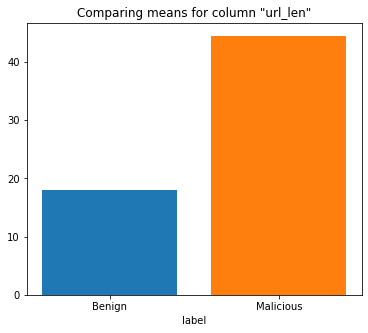

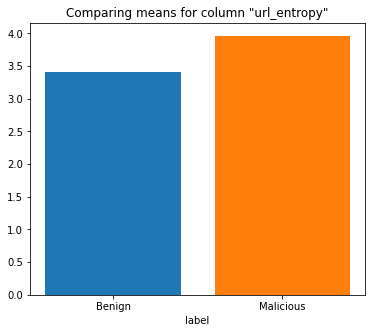

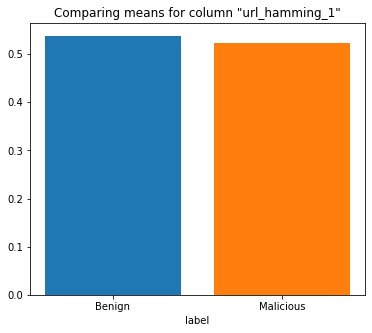

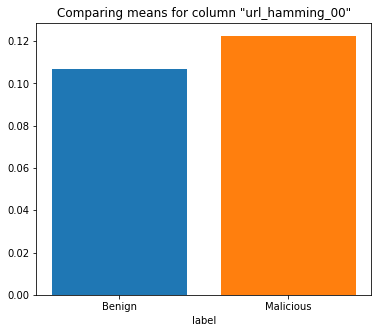

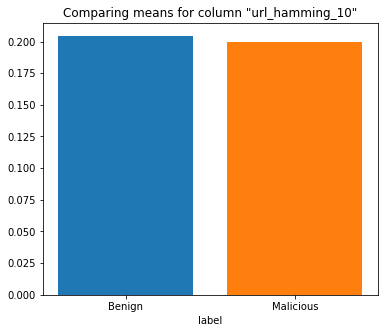

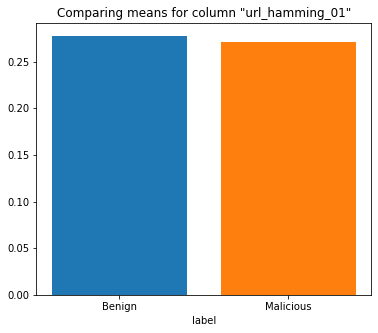

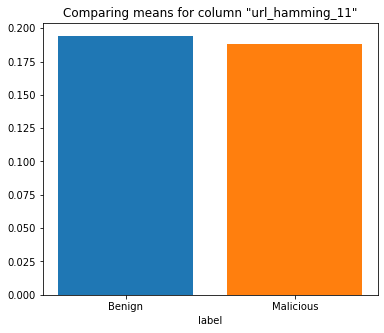

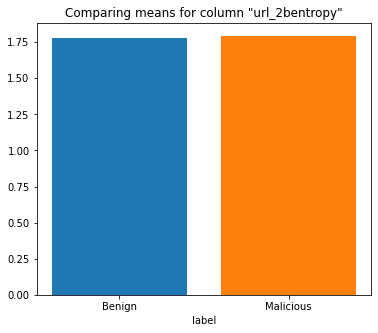

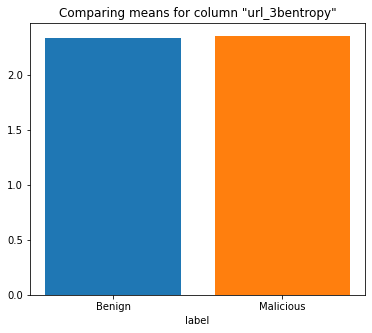

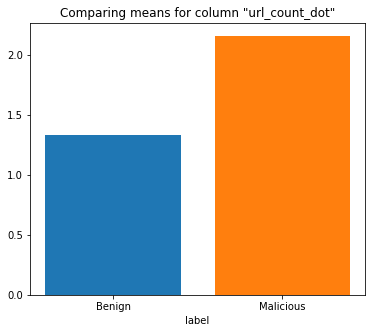

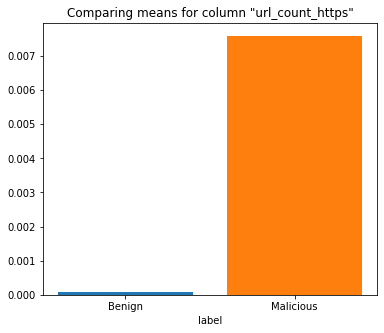

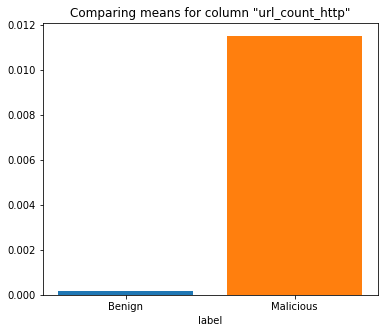

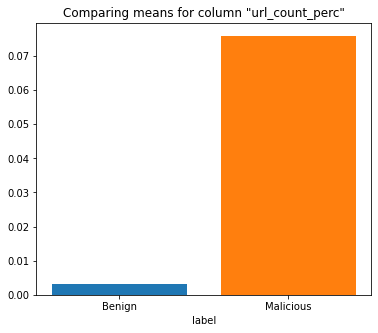

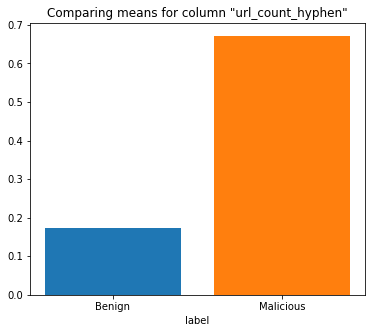

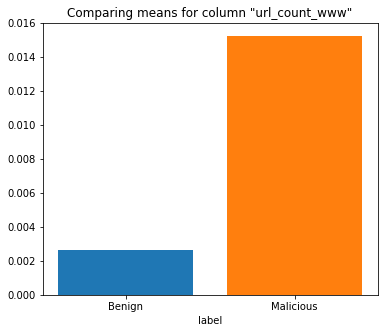

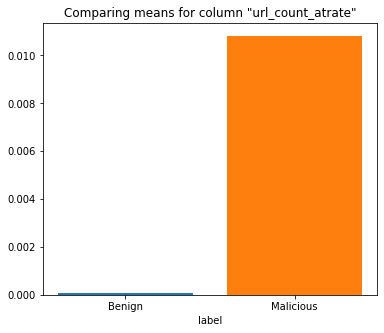

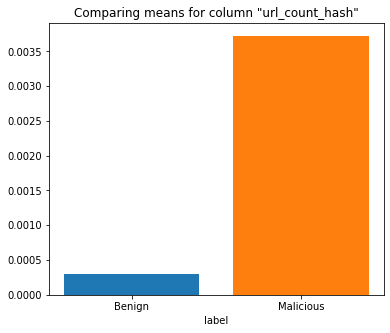

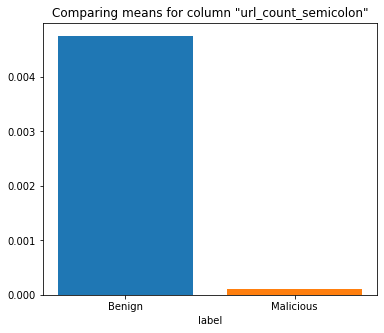

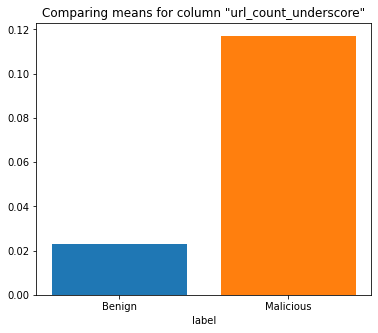

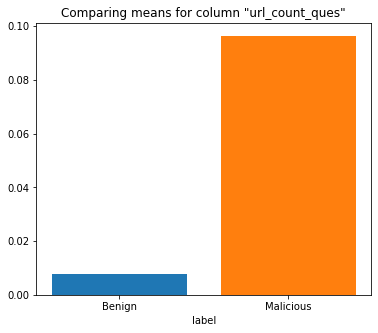

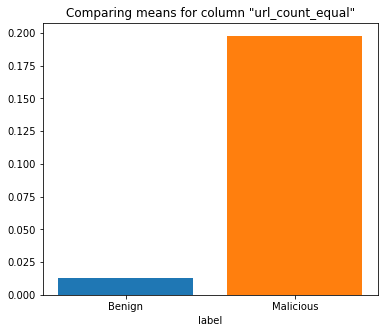

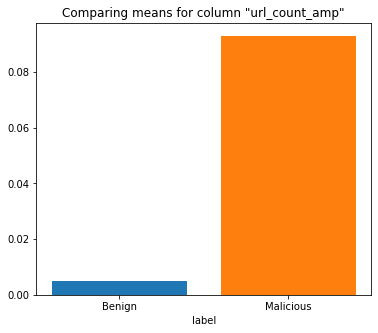

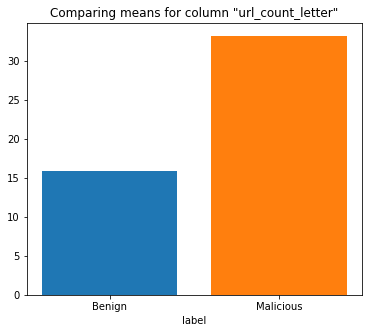

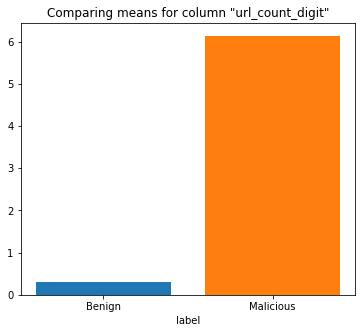

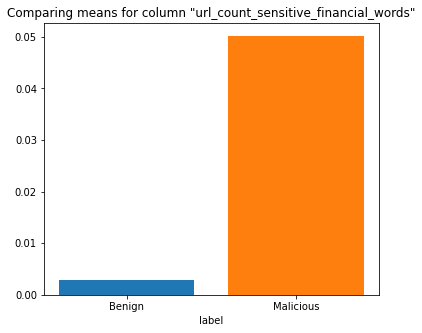

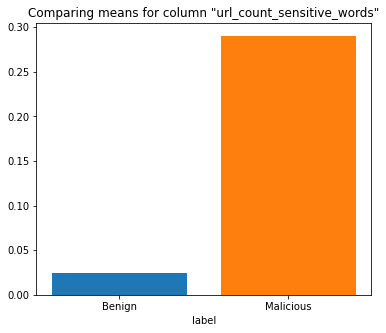

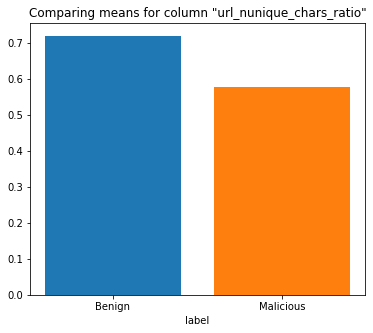

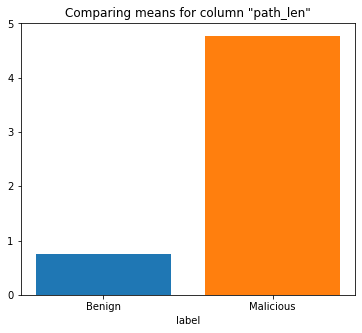

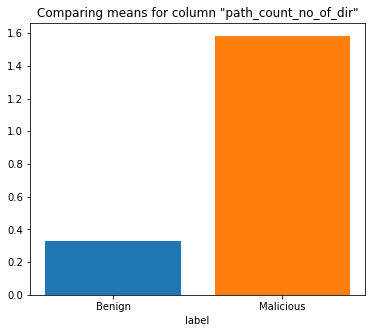

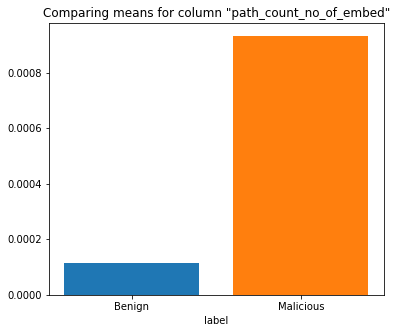

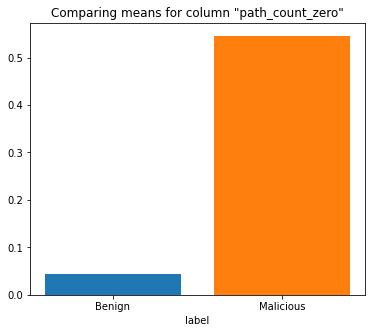

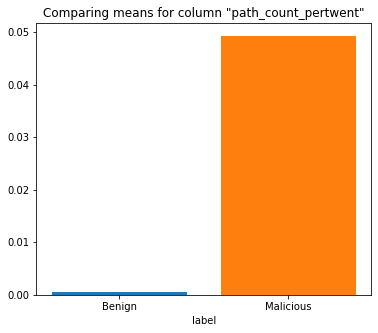

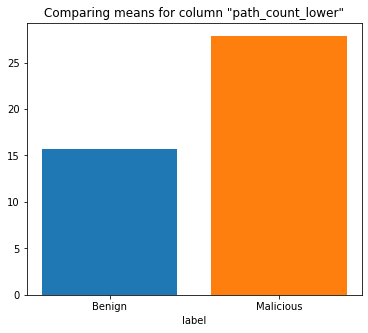

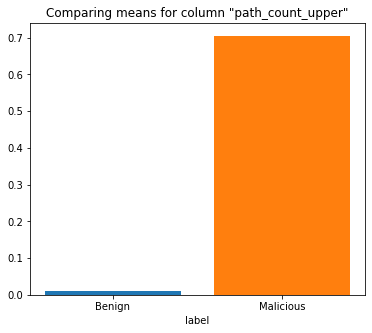

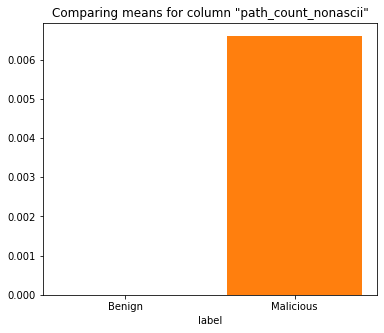

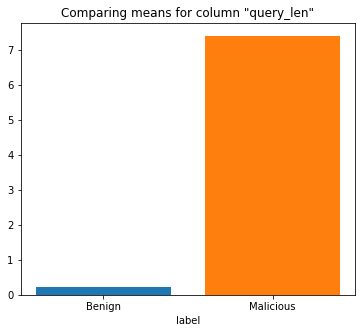

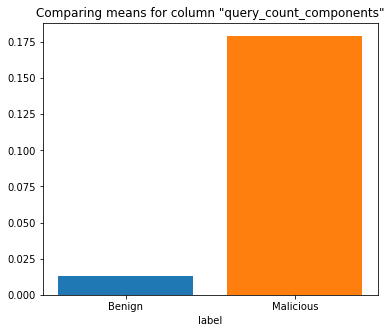

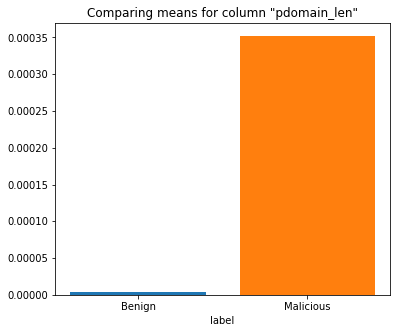

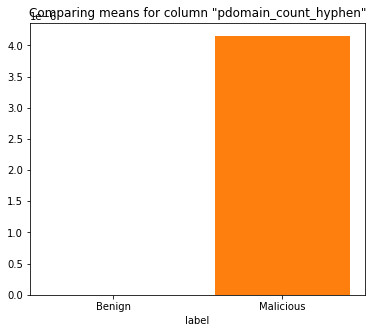

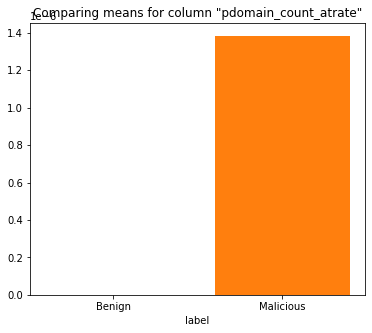

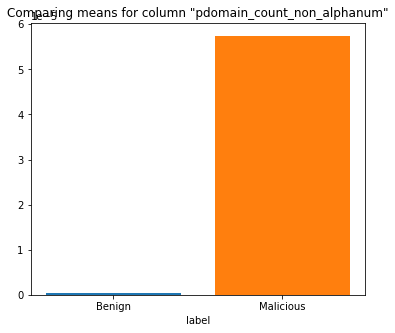

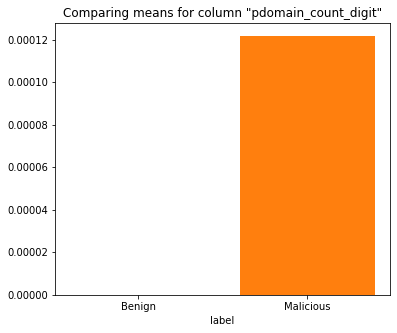

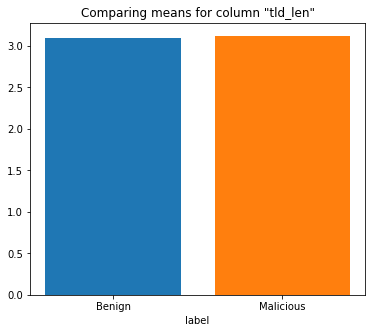

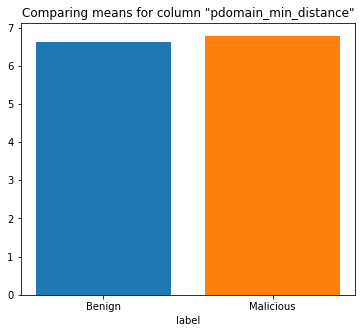

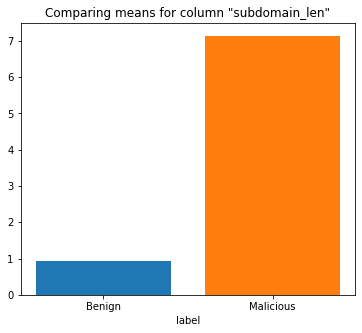

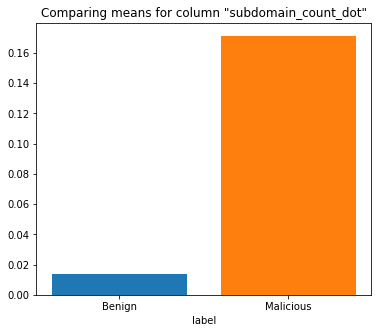

In [35]:
# side-by-side comparison of the averages for each numerical feature split by its label

b_avg = benign.drop(['label'], axis=1).mean()
m_avg = malicious.drop(['label'], axis=1).mean()

for column in numerical_col.drop(['label'], axis=1).columns:
    plt.figure(figsize=(6, 5))

    plt.bar('Benign', b_avg[column])
    
    plt.bar('Malicious', m_avg[column])

    plt.xlabel('label')
    plt.title(f'Comparing means for column "{column}"')
    
    plt.show()

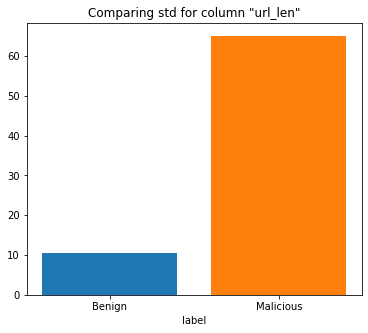

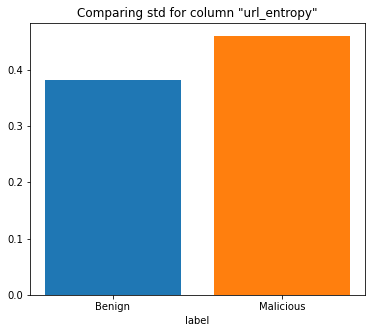

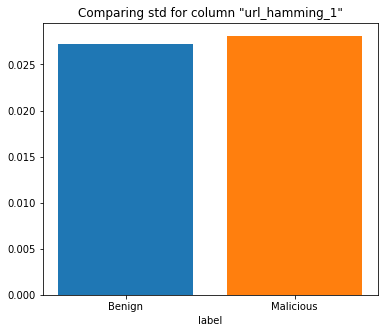

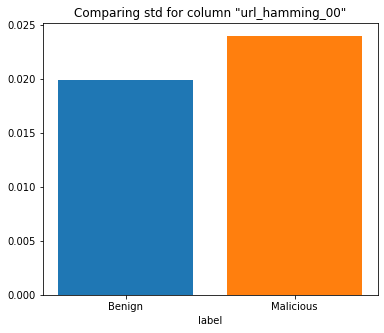

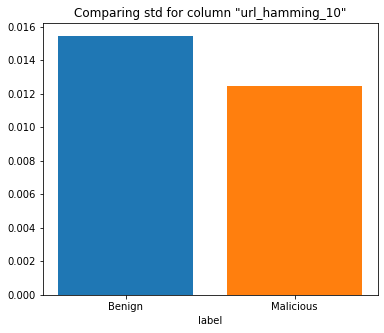

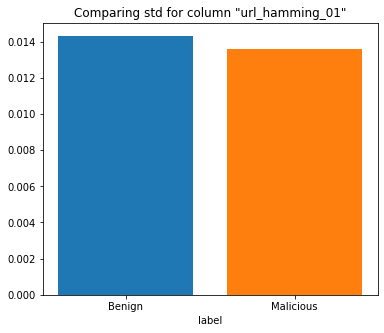

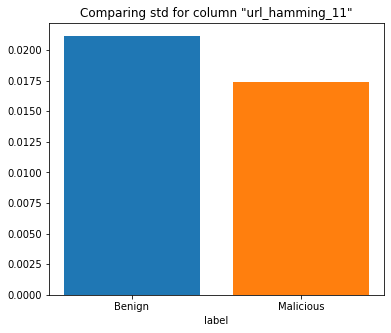

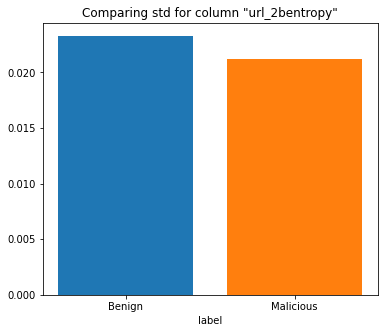

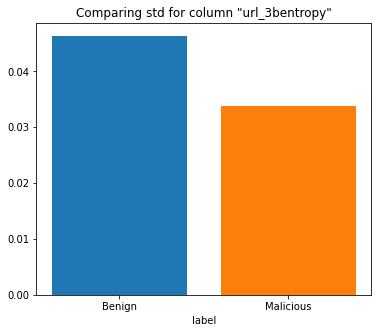

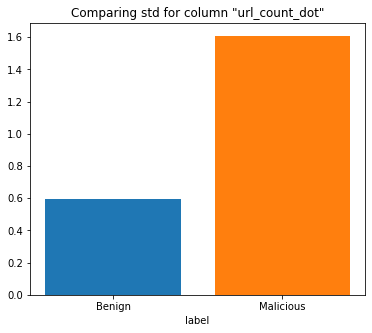

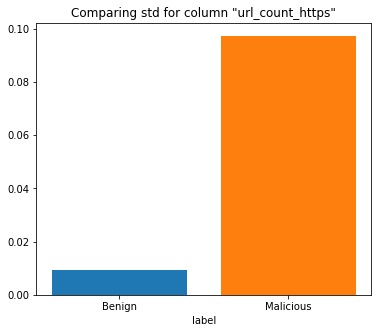

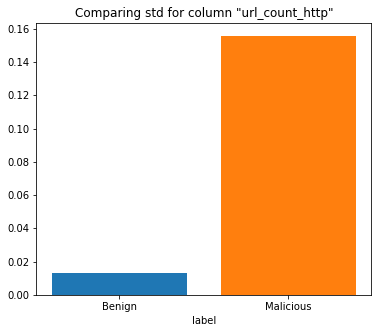

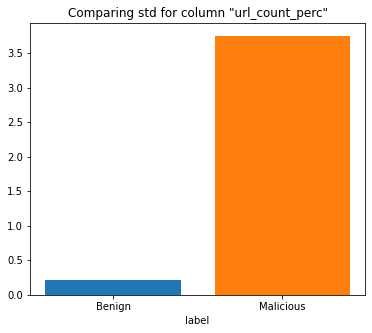

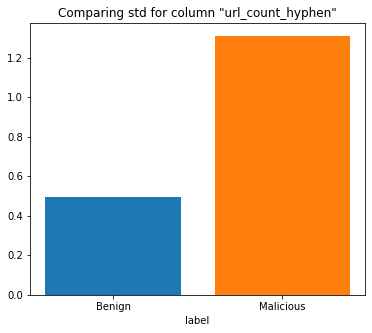

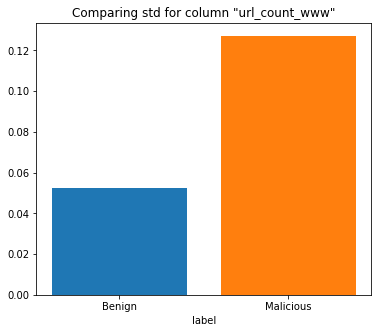

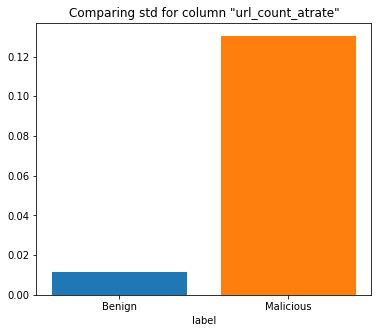

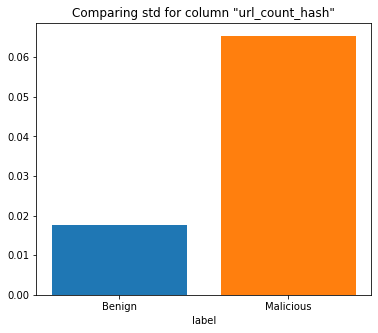

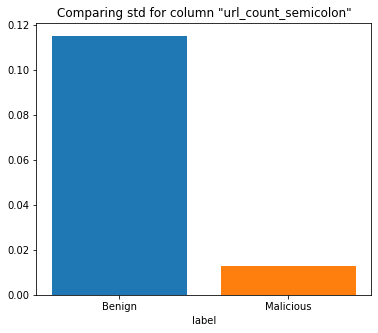

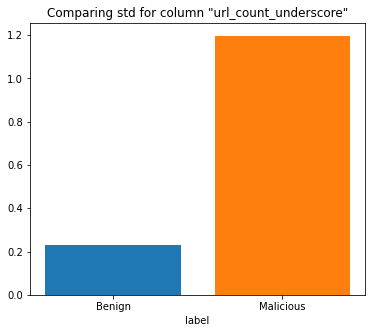

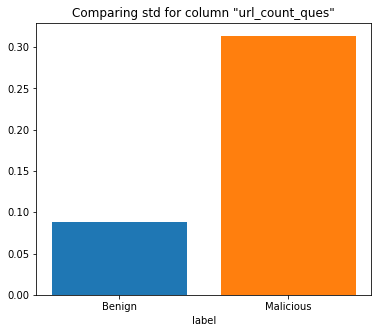

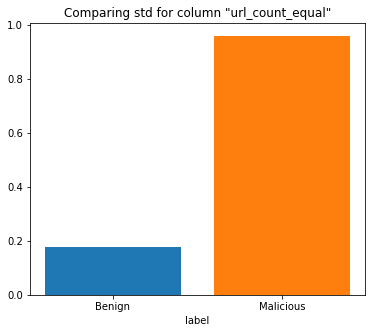

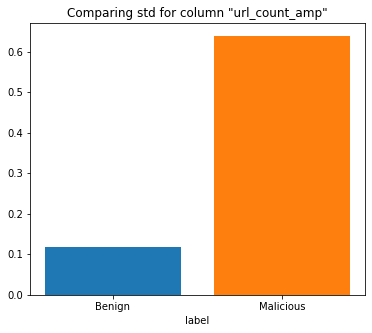

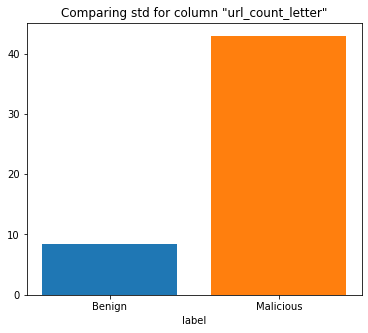

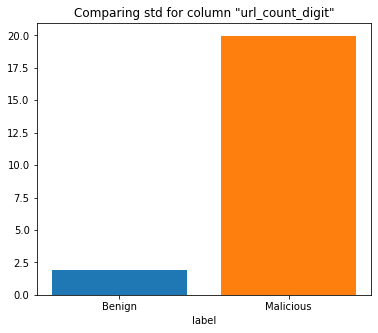

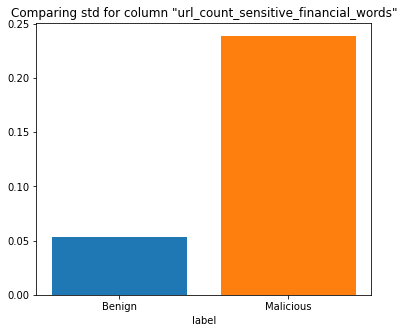

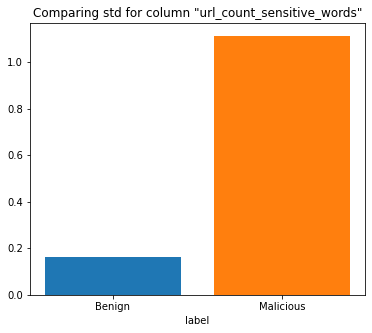

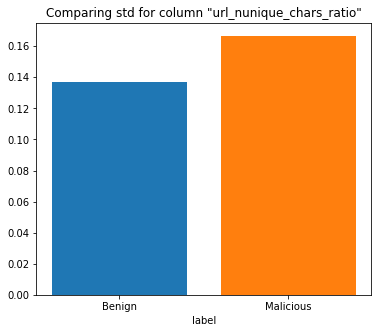

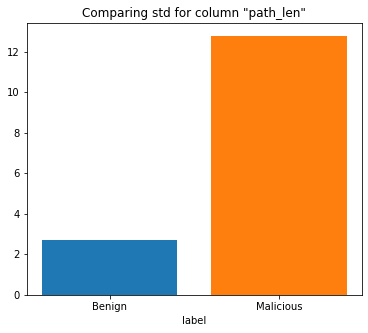

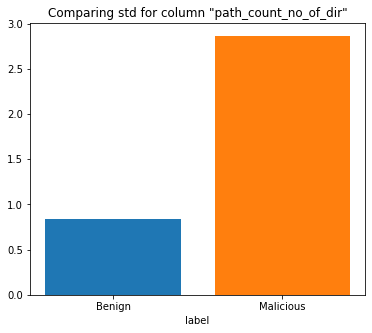

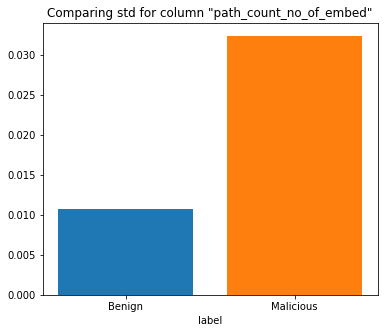

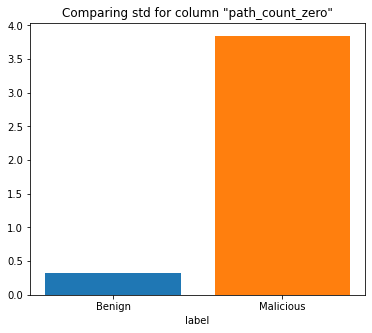

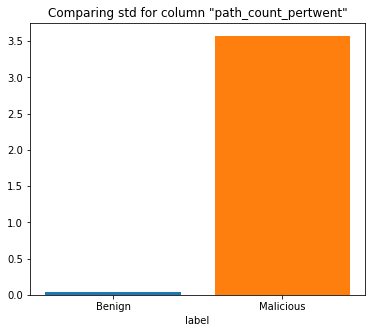

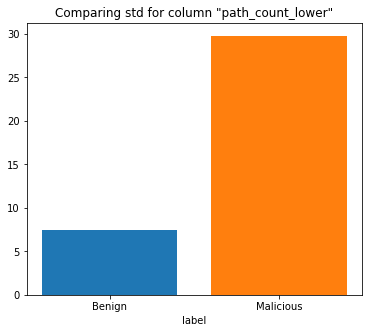

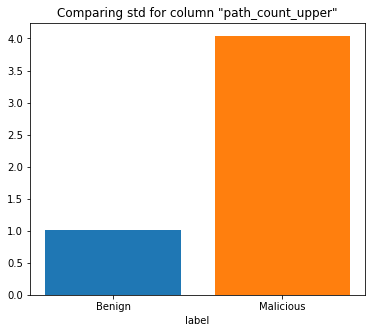

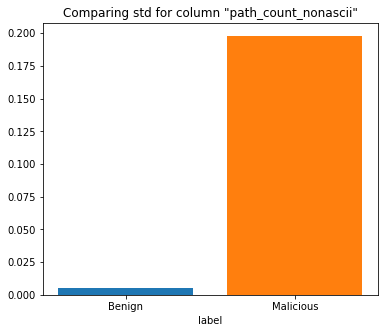

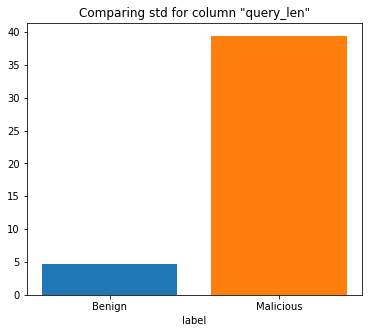

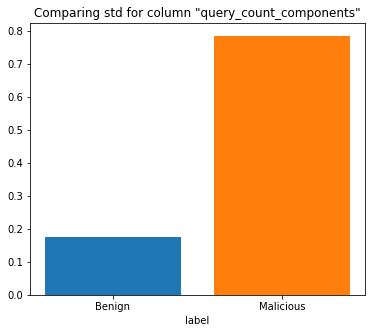

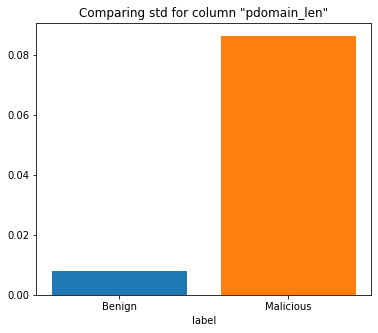

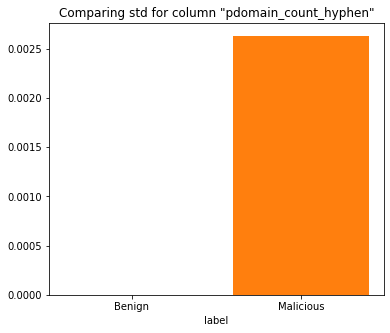

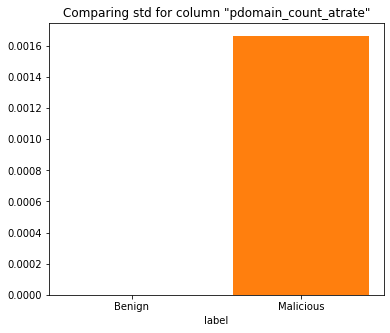

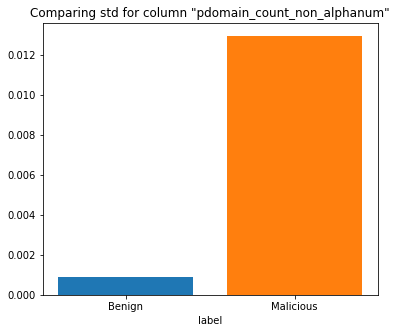

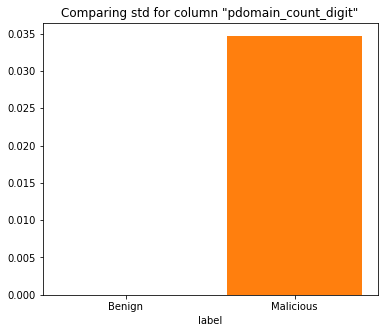

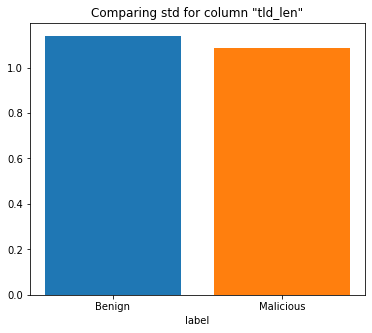

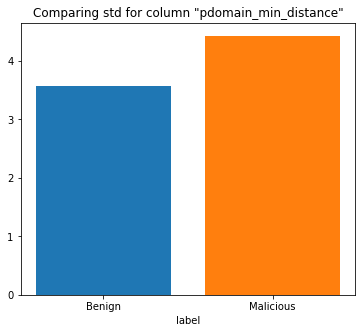

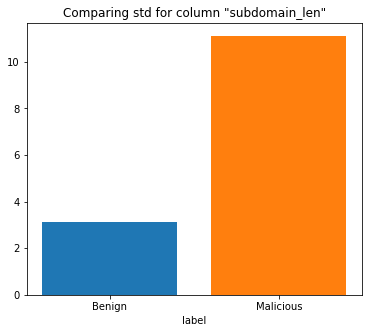

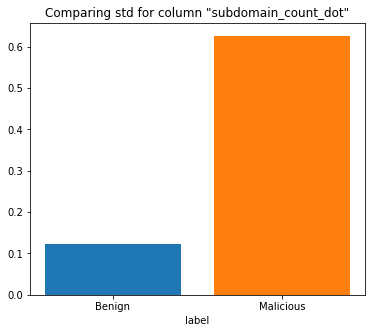

In [36]:
# side-by-side comparison of the standard deviations for each numerical feature split by its label

b_std = benign.drop(['label'], axis=1).std()
m_std = malicious.drop(['label'], axis=1).std()

for column in numerical_col.drop(['label'], axis=1).columns:
    plt.figure(figsize=(6, 5))

    plt.bar('Benign', b_std[column])
    
    plt.bar('Malicious', m_std[column])

    plt.xlabel('label')
    plt.title(f'Comparing std for column "{column}"')
    
    plt.show()

In [22]:
numerical_col.columns

Index(['label', 'url_len', 'url_entropy', 'url_hamming_1', 'url_hamming_00',
       'url_hamming_10', 'url_hamming_01', 'url_hamming_11', 'url_2bentropy',
       'url_3bentropy', 'url_count_dot', 'url_count_https', 'url_count_http',
       'url_count_perc', 'url_count_hyphen', 'url_count_www',
       'url_count_atrate', 'url_count_hash', 'url_count_semicolon',
       'url_count_underscore', 'url_count_ques', 'url_count_equal',
       'url_count_amp', 'url_count_letter', 'url_count_digit',
       'url_count_sensitive_financial_words', 'url_count_sensitive_words',
       'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir',
       'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent',
       'path_count_lower', 'path_count_upper', 'path_count_nonascii',
       'query_len', 'query_count_components', 'pdomain_len',
       'pdomain_count_hyphen', 'pdomain_count_atrate',
       'pdomain_count_non_alphanum', 'pdomain_count_digit', 'tld_len',
       'pdomain_min_distance'

In [37]:
corr_df = numerical_col.drop(columns=['label', 'url_entropy', 'url_hamming_1', 'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 'url_hamming_11',
                                       'url_2bentropy', 'url_3bentropy', 'url_count_dot', 'url_nunique_chars_ratio', 'path_count_lower',
                                       'tld_len', 'pdomain_min_distance', 'url_len', 'url_count_digit', 'query_len'])

<Axes: >

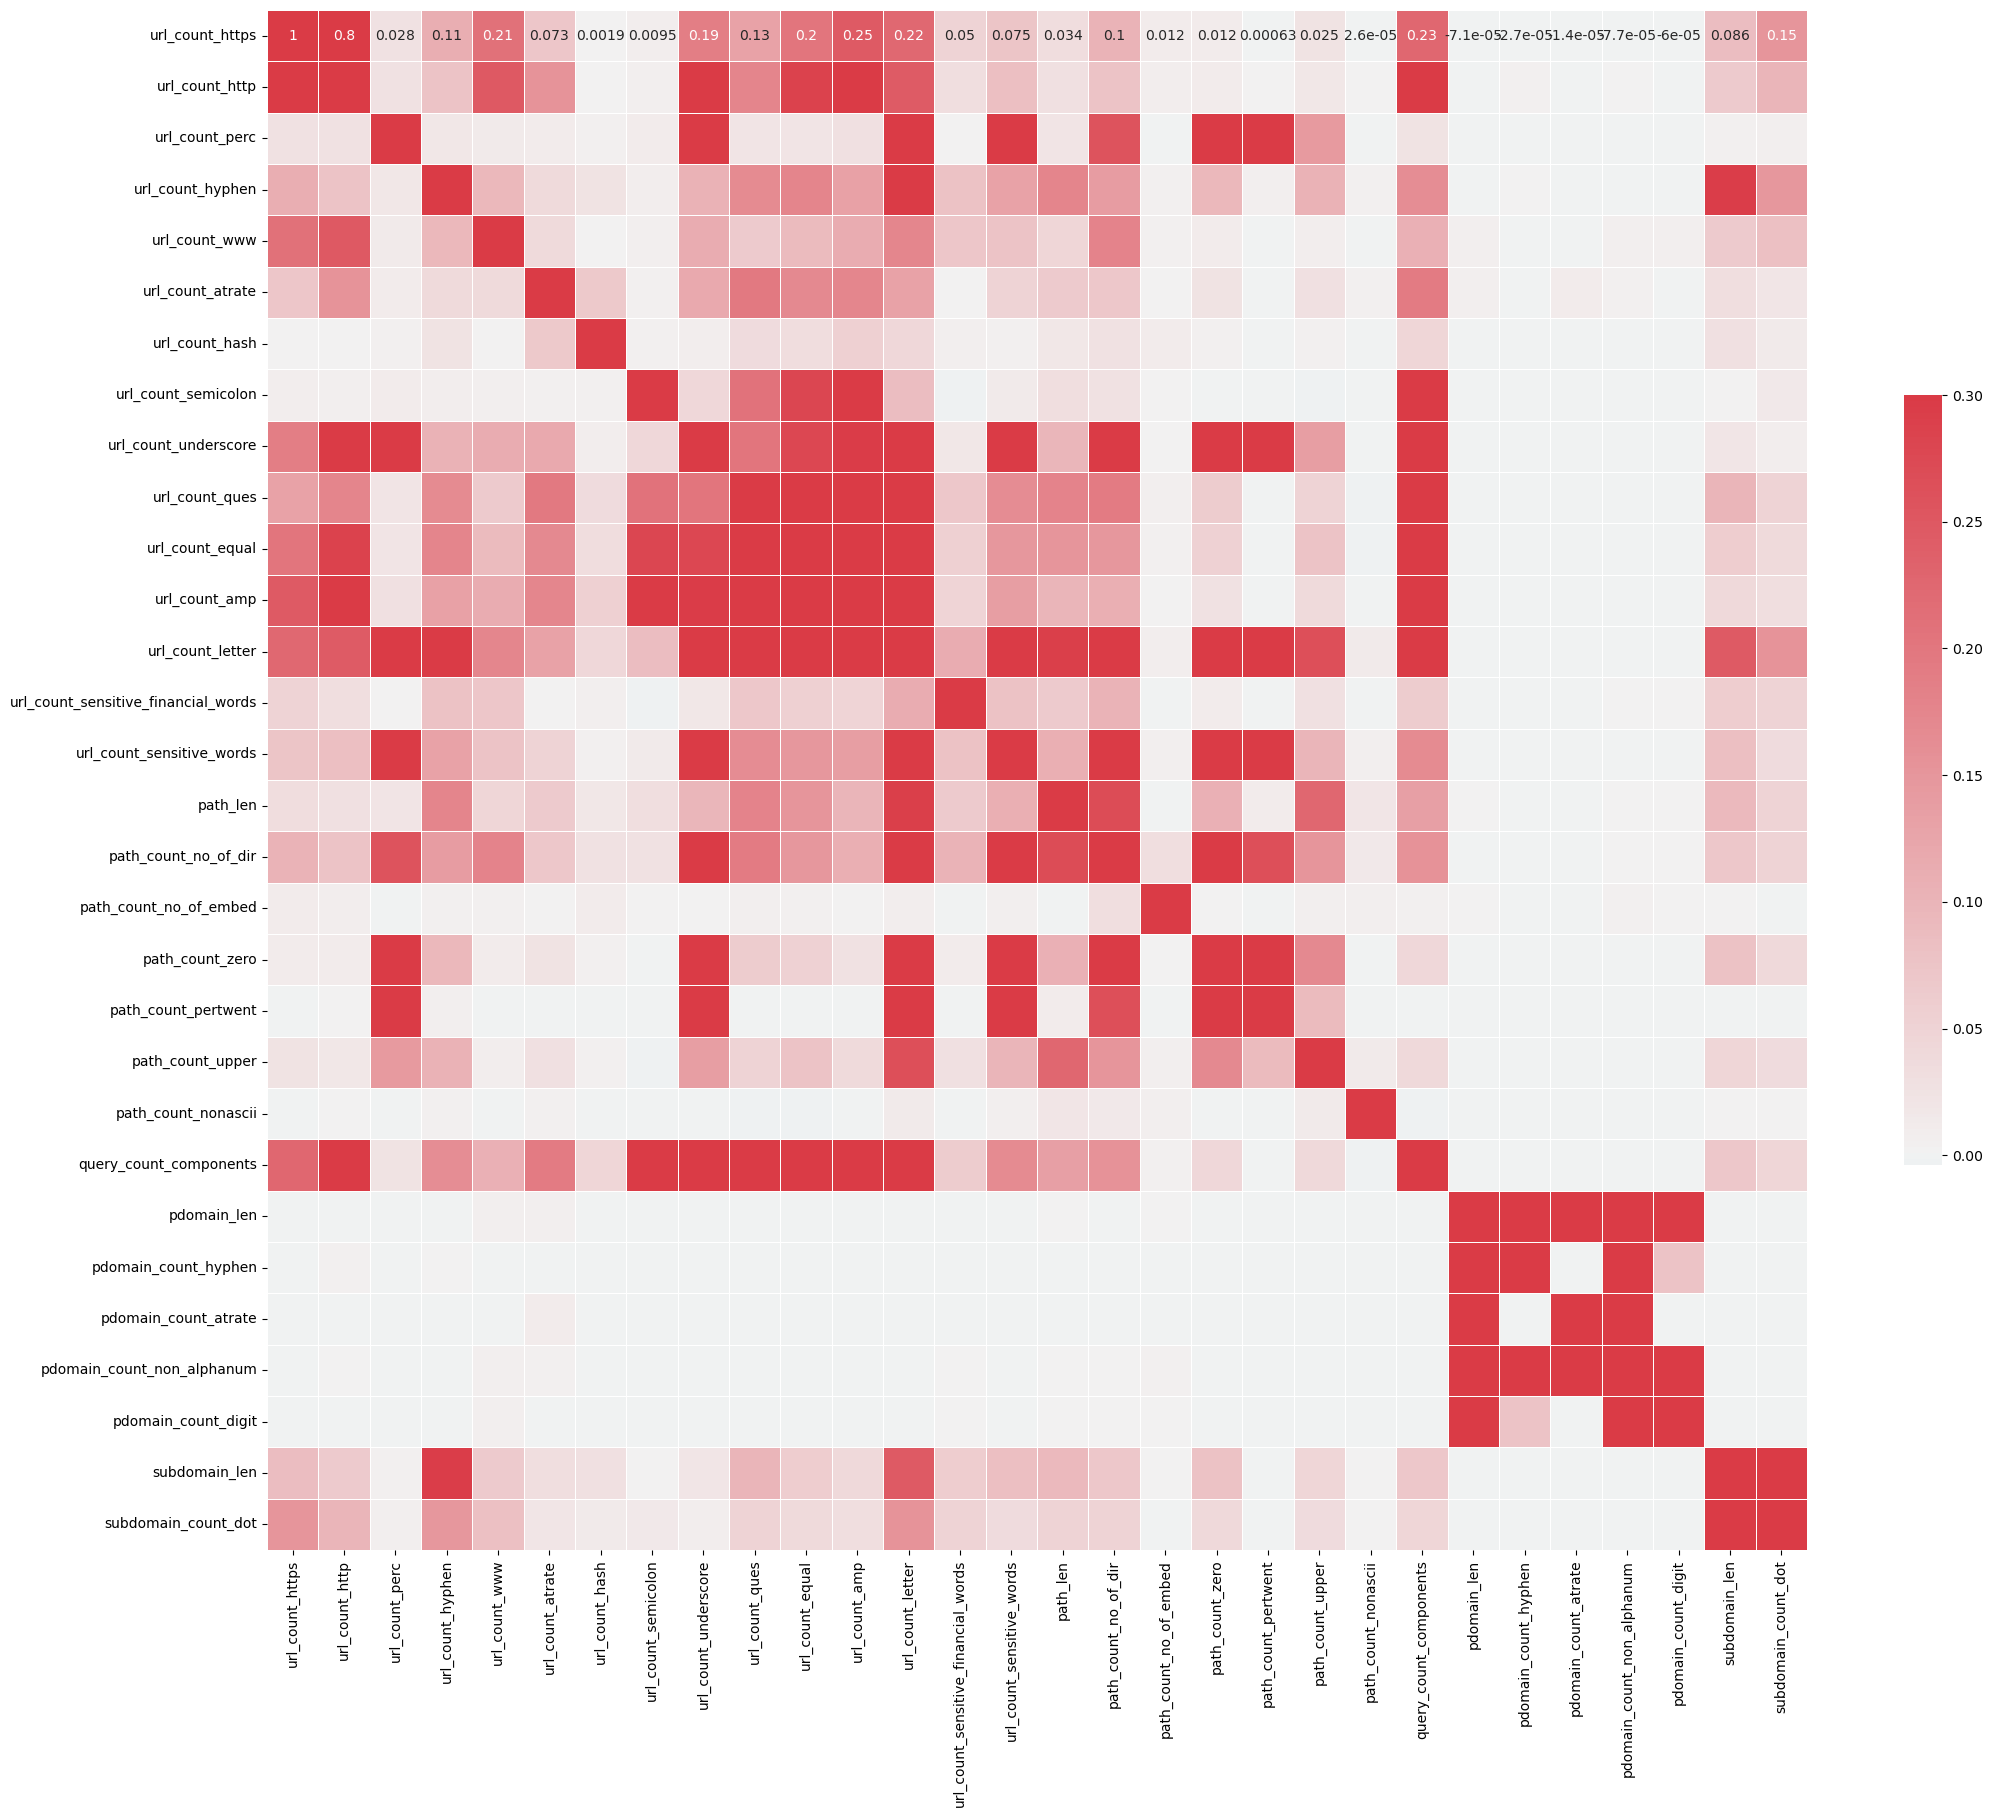

In [38]:
from scipy.stats import pointbiserialr

label = train['label']

# store coeffs
corr_coeffs = pd.DataFrame(index=corr_df.columns, columns=['Point-Biserial Correlation'])

# calc point-biserial correlation coefficients
for column in corr_df.columns:
    corr_coeff, _ = pointbiserialr(corr_df[column], label)
    corr_coeffs.at[column, 'Point-Biserial Correlation'] = corr_coeff


In [39]:
corr_coeffs.sort_values(by='Point-Biserial Correlation', ascending=True)

,Point-Biserial Correlation
url_count_semicolon,-0.018668
pdomain_count_atrate,0.000737
pdomain_count_hyphen,0.001398
pdomain_count_digit,0.003109
pdomain_len,0.003523
pdomain_count_non_alphanum,0.003866
path_count_pertwent,0.012071
url_count_perc,0.017073
path_count_no_of_embed,0.018915
path_count_nonascii,0.029478


In [40]:
# df of features to train on:
train_df = corr_df.drop(columns= ['pdomain_count_atrate', 'pdomain_count_hyphen', 'pdomain_count_digit','pdomain_len', 'pdomain_count_non_alphanum'])

In [41]:
sources = train['source'].unique()
for source in sources:
    train_df[f'from_{source}'] = train['source'].apply(lambda x: 1 if x == source else 0)

In [42]:
train_df['from_tranco_K2K4W'].sum() # checking that the numbers are correct

300632

In [87]:
# now we will train our models on the train_df features
X = train_df.drop(['from_top500Domains'], axis=1)
y = train['label']

In [77]:
test_df = pd.read_csv('test_dataset.csv')

In [79]:
sources = test_df['source'].unique()
for source in sources:
    test_df[f'from_{source}'] = test_df['source'].apply(lambda x: 1 if x == source else 0)

In [84]:
# top 500 domains does not appear in test dataset

X_test = test_df[['url_count_https', 'url_count_http', 'url_count_perc',
       'url_count_hyphen', 'url_count_www', 'url_count_atrate',
       'url_count_hash', 'url_count_semicolon', 'url_count_underscore',
       'url_count_ques', 'url_count_equal', 'url_count_amp',
       'url_count_letter', 'url_count_sensitive_financial_words',
       'url_count_sensitive_words', 'path_len', 'path_count_no_of_dir',
       'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent',
       'path_count_upper', 'path_count_nonascii', 'query_count_components',
       'subdomain_len', 'subdomain_count_dot', 'from_phishtank',
       'from_majestic_million', 'from_data_clean_test_mendel',
       'from_dmoz_harvard', 'from_data_clean_train_mendel', 'from_alexatop1m',
       'from_domcop', 'from_ALL-phishing-domains', 'from_tranco_K2K4W',
       'from_ALL-phishing-links', 'from_manual', 'from_aa419',
       'from_openphish']]

y_test = test_df['label']

In [90]:
X.shape[1] == X_test.shape[1]

True

In [91]:
# baseline model -- decision tree
# took 38 seconds

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
clf.fit(X, y)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9960094233013299


In [15]:
# FAILED ATTEMPT -- cut off at 88 mins
# baseline model -- SVM 

# from sklearn.svm import SVC

# X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

# clf = SVC(kernel='linear', C=1.0)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

c:\Users\Gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
# optimization and random forest
# took 10 mins

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# start with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)

print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.99629283 0.99623784 0.99614942 0.99622892 0.99627351]
Mean accuracy: 0.9962365028946147


In [92]:
# fit training data to RF and carry out predictions
# took 2 mins

from sklearn.metrics import recall_score, f1_score

rf.fit(X, y)

y_pred = rf.predict(X_test)


# compute recall and F1 scores 
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("recall score: ", recall)
print("F1 score: ", f1)

recall score:  0.9828232605369391
F1 score:  0.9911463681414349


In [98]:
# catboost 
# took 7 mins
import catboost

cb_model = catboost.CatBoostRegressor()  
cb_model.fit(X, y)

Learning rate set to 0.164814
0:	learn: 0.3448877	total: 472ms	remaining: 7m 51s
1:	learn: 0.2902614	total: 954ms	remaining: 7m 56s
2:	learn: 0.2449456	total: 1.43s	remaining: 7m 55s
3:	learn: 0.2076319	total: 1.89s	remaining: 7m 51s
4:	learn: 0.1769489	total: 2.36s	remaining: 7m 50s
5:	learn: 0.1518480	total: 2.86s	remaining: 7m 53s
6:	learn: 0.1315727	total: 3.32s	remaining: 7m 51s
7:	learn: 0.1152873	total: 3.79s	remaining: 7m 49s
8:	learn: 0.1023967	total: 4.25s	remaining: 7m 47s
9:	learn: 0.0922778	total: 4.77s	remaining: 7m 52s
10:	learn: 0.0845257	total: 5.25s	remaining: 7m 51s
11:	learn: 0.0785591	total: 5.75s	remaining: 7m 53s
12:	learn: 0.0741765	total: 6.22s	remaining: 7m 52s
13:	learn: 0.0708774	total: 6.74s	remaining: 7m 54s
14:	learn: 0.0685137	total: 7.22s	remaining: 7m 54s
15:	learn: 0.0668017	total: 7.72s	remaining: 7m 54s
16:	learn: 0.0655754	total: 8.18s	remaining: 7m 52s
17:	learn: 0.0646202	total: 8.66s	remaining: 7m 52s
18:	learn: 0.0639306	total: 9.18s	remaining:

In [97]:
y_pred = cb_model.predict(X_test)

y_pred

array([-6.30812725e-06,  1.85569686e-05, -1.07141785e-05, ...,
        9.99959312e-01, -3.67068963e-05, -1.81498171e-05])